In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
#train_df = pd.read_csv("fairface_label_train.csv")
#test_df = pd.read_csv("fairface_label_val.csv")
#train_df.shape

In [3]:
#train_df.head()

In [4]:
#train_df["age"].unique()

In [5]:
#train_df["race"].unique()

In [6]:
path = "UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 17336
100_0_0_20170112213500903.jpg.chip.jpg


In [7]:
images = []
ages = []
genders = []
ethnicity = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(120,120),interpolation=cv2.INTER_AREA)
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]) )
    ethnicity.append(int(split_var[2]) )

- [age] is an integer from 0 to 116, indicating the age.<br>
- [gender] is either 0 (male) or 1 (female)<br>
- [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).<br>
- [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace


Age : 17
Gender :  0
Ethnic :  4


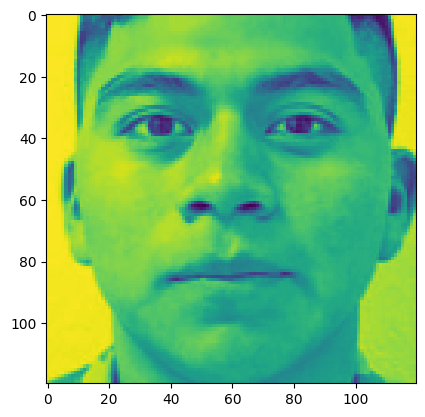

In [8]:
plt.imshow(images[876])
print("Age :",ages[876])
print("Gender : ",genders[876])
print("Ethnic : ",ethnicity[876])

In [9]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)
ethnic_f = np.array(ethnicity)

In [10]:
len(images_f)

17336

In [11]:
df = pd.DataFrame({'features':images,'Age': ages_f, 'Gender': genders_f, 'Ethnic':ethnic_f})#, 'Pixels': images_f})

In [12]:
df.to_csv('age_gender_ethnic_gray.csv',index=False)
#df.to_csv('age_gender_ethnic.csv',index=False)

In [13]:
#Make sure all values are correct
df["Ethnic"].unique()

array([0, 2, 1, 3, 4])

In [14]:
df.describe()

Age        Gender        Ethnic
count  17336.000000  17336.000000  17336.000000
mean      34.617213      0.496770      1.547762
std       21.340202      0.500004      1.366129
min        1.000000      0.000000      0.000000
25%       22.000000      0.000000      0.000000
50%       30.000000      0.000000      1.000000
75%       48.000000      1.000000      3.000000
max      116.000000      1.000000      4.000000

To make sure there is no null value

In [15]:
df.isna().sum()

features    0
Age         0
Gender      0
Ethnic      0
dtype: int64

In [16]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)
print("Number of Age: ",len(values))

[661 416 289 241 149 126 139 175 103 111  48 129  76  77 152 194 149 188
  76 250 327 362 411 655 540 619 521 615 444 618 310 477 149 278 498 328
 185 257 190 329 131 192 120  94 248 115 106 137 142 222 117 204 164 166
 212 186  98 196  67 192 153 125  99  53 255  74  94  99  56 147  32  98
  63  32 148  57  28  69  23 132  22  40  18  24 144  35  10  34  33  82
   2  13   5   9  17   9  11   2   1   5   5   3   4]
Number of Age:  103


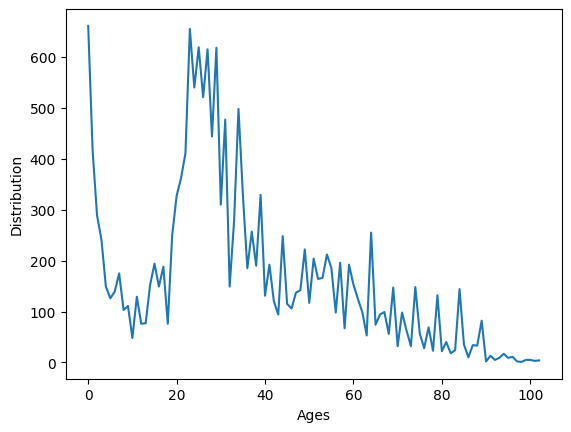

In [17]:
val = values.tolist()
cnt = counts.tolist()
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [18]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[8724 8612]


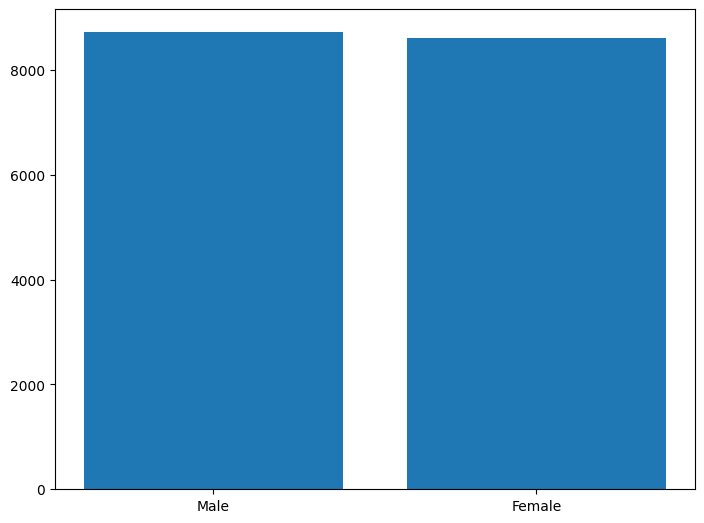

In [19]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
ax.bar(gender,counts)
plt.show()

In [20]:
values, counts=np.unique(ethnic_f,return_counts=True)
print(counts)

[5551 3444 3407 3162 1772]


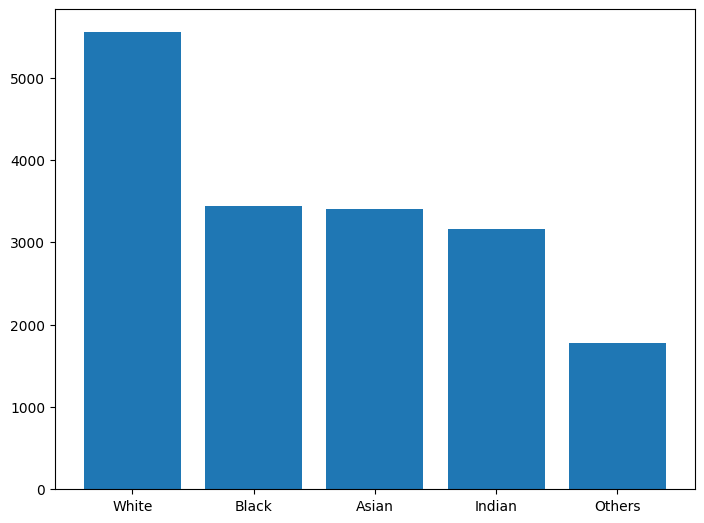

In [21]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ethnic=['White', 'Black', 'Asian', 'Indian', 'Others']
ax.bar(ethnic,counts)
plt.show()

## Interactive Plots

In [22]:
import plotly.graph_objects as go
import plotly.express as px

## calculating distributions
age_dist = df['Age'].value_counts()
ethnicity_dist = df['Ethnic'].value_counts().rename({0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian',4:'Others'})
gender_dist = df['Gender'].value_counts().rename(index={0:'Male',1:'Female'})

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

In [23]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

In [24]:
ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')

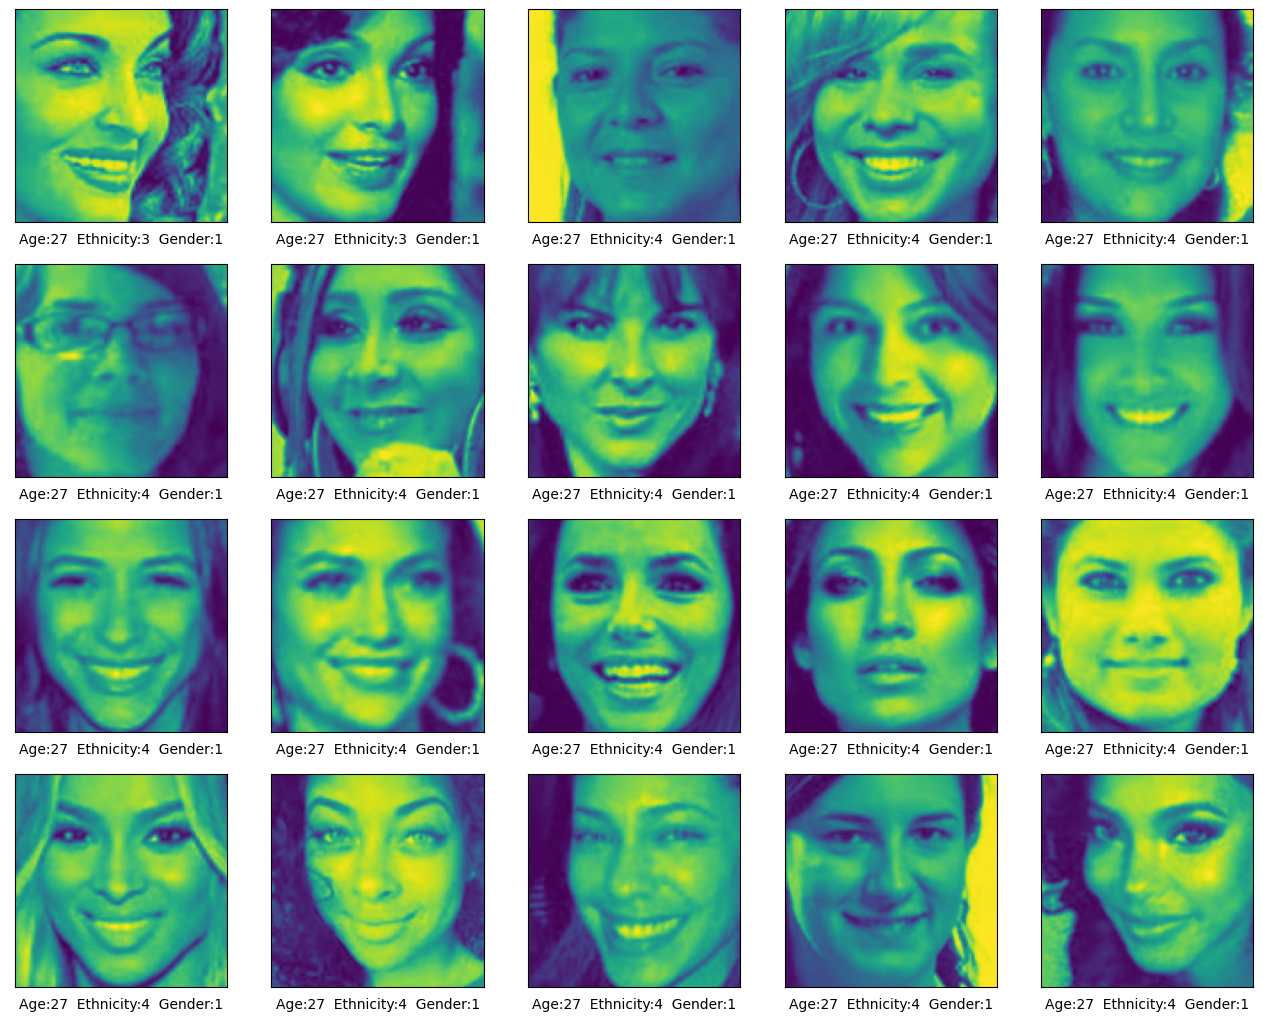

In [25]:
plt.figure(figsize=(16,16))
for i in range(5555,5575):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(120,120,1))
    plt.xlabel(
        "Age:"+str(df['Age'].iloc[i])+
        "  Ethnicity:"+str(df['Ethnic'].iloc[i])+
        "  Gender:"+ str(df['Gender'].iloc[i])
    )
plt.show()

### Preprocessing

In [26]:
vyfch
target = np.zeros((size,3),dtype='int32')
features = np.zeros((size,images[0].shape[0],images[0].shape[1],3),dtype = 'float32')
for i in range(size):
    target[i,0] = int(ages[i])
    target[i,1] = int(genders[i])
    target[i,2] = int(ethnicity[i])
    features[i] = images[i]
features = features / 255
#display(features[550])

NameError: name 'vyfch' is not defined

In [ ]:
df.shape

In [ ]:
target = df.iloc[:,1:]
features = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

In [ ]:
y_train[0:10]

In [ ]:
x_train.shape

In [ ]:
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D,Convolution2D,Dropout,Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model, Sequential
#from resnets_utils import *
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow

In [ ]:
from keras.applications import MobileNet

MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (64, 64, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
#for (i,layer) in enumerate(MobileNet.layers):
#    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

# Set our class number to 117
num_classes = 117

FC_Head = lw(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("Facial_recogNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

"""#history = model.fit(train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)"""

a = model.fit(x_train,y_train[:,0],validation_data=(x_test,y_test[:,0]),epochs = 5, batch_size=16,shuffle = True)

In [ ]:
inputs = Input(shape=(128,128,3))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
pool = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(pool)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu', name='Age_Model')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid', name="Gender_Model")(gender_model)

dropout = Dropout(0.5)
ethnic_model = Dense(128, activation='relu')(flat)
ethnic_model = dropout(ethnic_model)
ethnic_model = Dense(64, activation='relu')(ethnic_model)
ethnic_model = Dense(32, activation='relu')(ethnic_model)
ethnic_model = Dense(16, activation='relu')(ethnic_model)
ethnic_model = dropout(ethnic_model)
ethnic_model = Dense(8, activation='relu')(ethnic_model)
ethnic_model = dropout(ethnic_model)
ethnic_model = Dense(5, activation='relu', name="Ethnic_Model")(ethnic_model)

In [ ]:
"""model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(117, activation='relu'))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))"""

In [ ]:
#for layer in model.layers[:-7]:
#    layer.trainable = False
    
#model.load_weights('weights/vgg_face_weights.h5')

base_model_output = Sequential()
base_model_output = Convolution2D(num_of_classes, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)
 
race_model = Model(inputs=model.input, outputs=base_model_output)

In [ ]:
#model = Model(inputs=inputs, outputs=[age_model,gender_model,ethnic_model])
#model.compile(optimizer = 'adam', loss =['mean_squared_error','binary_crossentropy','sparse_categorical_crossentropy'],metrics=['accuracy'])

In [ ]:
model = Model(inputs=inputs, outputs=gender_model)
model.compile(optimizer = 'adam', loss =['binary_crossentropy'],metrics=['accuracy'])

model.summary()

In [ ]:
#model.summary()

In [ ]:
#h = model.fit(x_train,[y_train[:,0],y_train[:,1],y_train[:,2]],validation_data=(x_test,[y_test[:,0],y_test[:,1],y_test[:,2]]),epochs = 25, batch_size=16)#,shuffle = True)
a = model.fit(x_train,y_train[:,0],validation_data=(x_test,y_test[:,0]),epochs = 5, batch_size=16,shuffle = True)

In [ ]:
history = a
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('age model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#a = model.fit(x_train[5001:10000],y_train[5001:10000,0],validation_data=(x_test[5001:10000],y_test[5001:10000,0]),epochs = 3, batch_size=16,shuffle = True)

In [ ]:
"""model_gender = Model(inputs=inputs, outputs=gender_model)
model_gender.compile(optimizer = 'adam', loss =['binary_crossentropy'],metrics=['accuracy'])"""

In [ ]:
#g = model_gender.fit(x_train,y_train[:,1],validation_data=(x_test,y_test[:,1]),epochs =4, batch_size=4,shuffle = True)

In [ ]:
"""history = g
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('gender model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()"""

In [ ]:
features[5555].shape

In [ ]:
test_img = np.array(images[5525:5534])/255
predictionsa = model_age.predict(test_img)
#predictionsg = model_gender.predict(test_img)

In [ ]:
"""test_img = cv2.imread("testpic/FB_IMG_1530451531928.jpg")
test_img = cv2.resize(test_img,dsize=(64,64))
test_img = test_img.reshape((test_img.shape[0],test_img.shape[1],3))
test_img = test_img/255
predictions2 = model.predict(test_img)"""

In [ ]:
#len(predictions[0])

In [ ]:
#predictions

In [ ]:
#labels_g=np.around(predictionsg)#.astype(int)
#labels_g

In [ ]:
labels_a=predictionsa.astype(int)
labels_a

In [ ]:
plt.figure(figsize=(16,16))
for j,i in enumerate(range(5525,5534)):
    plt.subplot(3,3,(i%9)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(64,64,3))
    plt.xlabel(
        "Age:"+str(df['Age'].iloc[i])+
        "  Ethnicity:"+str(df['Ethnic'].iloc[i])+
        "  Gender:"+ str(df['Gender'].iloc[i])+
        "\n Predicted Age: "+str(labels_a[j])+
        "\n Predicted Gender: "#+str(labels_g[j])
    )
plt.show()

#### Need to improve data on older ages

In [ ]:
tf.config.list_physical_devices('GPU')